In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df = pd.read_csv('promotion_dataset.csv') 
df.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,YAK/S/00001,Commercial Sales and Marketing,MSc MBA and PhD,Female,Direct Internal process,2,1986,12.5,2011,1,0,41,ANAMBRA,No,Married,No,No,0,0
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1991,12.5,2015,0,0,52,ANAMBRA,Yes,Married,No,No,0,0
2,YAK/S/00003,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1987,7.5,2012,0,0,42,KATSINA,Yes,Married,No,No,0,0
3,YAK/S/00004,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,3,1982,2.5,2009,0,0,42,NIGER,Yes,Single,No,No,1,0
4,YAK/S/00006,Information and Strategy,First Degree or HND,Male,Direct Internal process,3,1990,7.5,2012,0,0,77,AKWA IBOM,Yes,Married,No,No,1,0


In [12]:
df.shape

(38312, 19)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38312 entries, 0 to 38311
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   EmployeeNo                           38312 non-null  object 
 1   Division                             38312 non-null  object 
 2   Qualification                        36633 non-null  object 
 3   Gender                               38312 non-null  object 
 4   Channel_of_Recruitment               38312 non-null  object 
 5   Trainings_Attended                   38312 non-null  int64  
 6   Year_of_birth                        38312 non-null  int64  
 7   Last_performance_score               38312 non-null  float64
 8   Year_of_recruitment                  38312 non-null  int64  
 9   Targets_met                          38312 non-null  int64  
 10  Previous_Award                       38312 non-null  int64  
 11  Training_score_average      

In [5]:
df.describe()

,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,No_of_previous_employers,Promoted_or_Not
count,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000
mean,2.253680,1986.209334,7.698959,2013.139695,0.352996,0.023152,55.366465,1.040953,0.084595
std,0.609443,7.646047,3.744135,4.261451,0.477908,0.150388,13.362741,1.235738,0.278282
min,2.000000,1950.000000,0.000000,1982.000000,0.000000,0.000000,31.000000,0.000000,0.000000
25%,2.000000,1982.000000,5.000000,2012.000000,0.000000,0.000000,43.000000,0.000000,0.000000
50%,2.000000,1988.000000,7.500000,2014.000000,0.000000,0.000000,52.000000,1.000000,0.000000
75%,2.000000,1992.000000,10.000000,2016.000000,1.000000,0.000000,68.000000,1.000000,0.000000
max,11.000000,2001.000000,12.500000,2018.000000,1.000000,1.000000,91.000000,6.000000,1.000000


In [6]:
df.columns

Index(['EmployeeNo', 'Division', 'Qualification', 'Gender',
       'Channel_of_Recruitment', 'Trainings_Attended', 'Year_of_birth',
       'Last_performance_score', 'Year_of_recruitment', 'Targets_met',
       'Previous_Award', 'Training_score_average', 'State_Of_Origin',
       'Foreign_schooled', 'Marital_Status', 'Past_Disciplinary_Action',
       'Previous_IntraDepartmental_Movement', 'No_of_previous_employers',
       'Promoted_or_Not'],
      dtype='object')

In [12]:
print(df['Promoted_or_Not'])

0        0
1        0
2        0
3        0
4        0
        ..
38307    0
38308    0
38309    0
38310    0
38311    0
Name: Promoted_or_Not, Length: 38312, dtype: int64


In [17]:
df['Promoted_or_Not'].value_counts(normalize=True) * 100

Promoted_or_Not
0    91.54051
1     8.45949
Name: proportion, dtype: float64

In [14]:
df['Promoted_or_Not'].unique()

array([0, 1])

In [15]:
df['Promoted_or_Not'].value_counts()

Promoted_or_Not
0    35071
1     3241
Name: count, dtype: int64

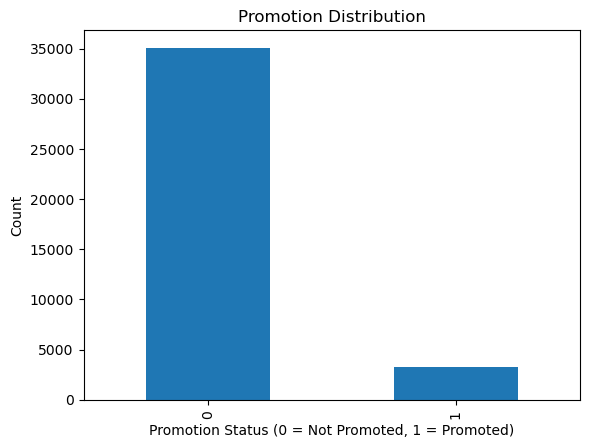

In [36]:
df['Promoted_or_Not'].value_counts().plot(kind='bar')
plt.xlabel('Promotion Status (0 = Not Promoted, 1 = Promoted)')
plt.ylabel('Count')
plt.title('Promotion Distribution')
plt.show()

In [21]:
df.groupby('Promoted_or_Not')[['Last_performance_score',
                               'Trainings_Attended',
                               'Targets_met',
                               'Year_of_birth'
                              ]].mean()



,Last_performance_score,Trainings_Attended,Targets_met,Year_of_birth
Promoted_or_Not,,,,
0,7.562730,2.258191,0.320379,1986.167517
1,9.173095,2.204875,0.705955,1986.661833


In [22]:
pd.crosstab(df['Gender'], df['Promoted_or_Not'], normalize='index') * 100


Promoted_or_Not,0,1
Gender,,
Female,91.095171,8.904829
Male,91.729911,8.270089


In [ ]:
pd.crosstab(df['Gender'], df['Promoted_or_Not'], normalize='index') * 100

In [38]:
pd.crosstab(df['Year_of_recruitment'], df['Promoted_or_Not'], normalize='index') * 100


Promoted_or_Not,0,1
Year_of_recruitment,,
1982,100.000000,0.000000
1985,75.000000,25.000000
1986,100.000000,0.000000
1987,75.000000,25.000000
1988,100.000000,0.000000
1989,100.000000,0.000000
1990,95.454545,4.545455
1991,90.476190,9.523810
1992,95.000000,5.000000


In [ ]:
tips_data.profile_report()

In [24]:
pd.crosstab(df['Channel_of_Recruitment'], df['Promoted_or_Not'], normalize='index') * 100


Promoted_or_Not,0,1
Channel_of_Recruitment,,
Agency and others,91.572032,8.427968
Direct Internal process,91.682104,8.317896
Referral and Special candidates,87.871287,12.128713


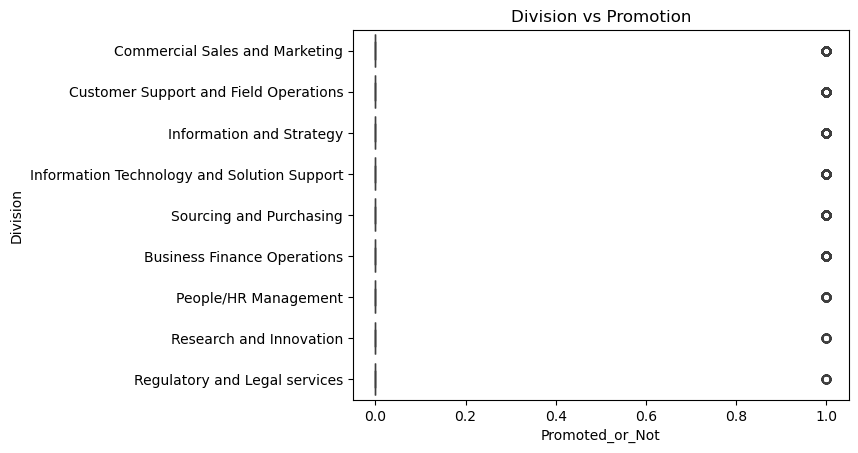

In [11]:
import seaborn as sns
sns.boxplot(data=df, x='Promoted_or_Not', y='Division')
plt.title('Division vs Promotion')
plt.show()

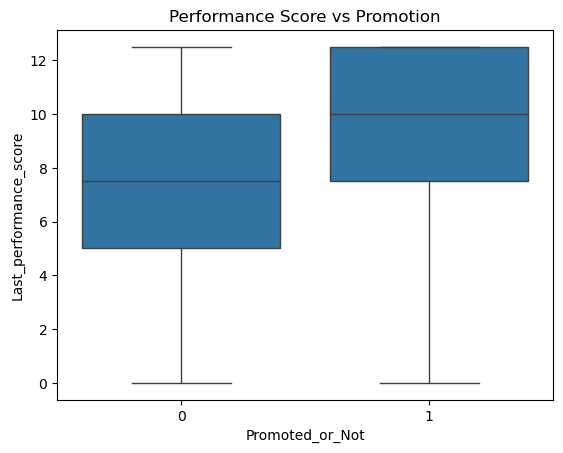

In [37]:
sns.boxplot(data=df, x='Promoted_or_Not', y='Last_performance_score')
plt.title('Performance Score vs Promotion')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

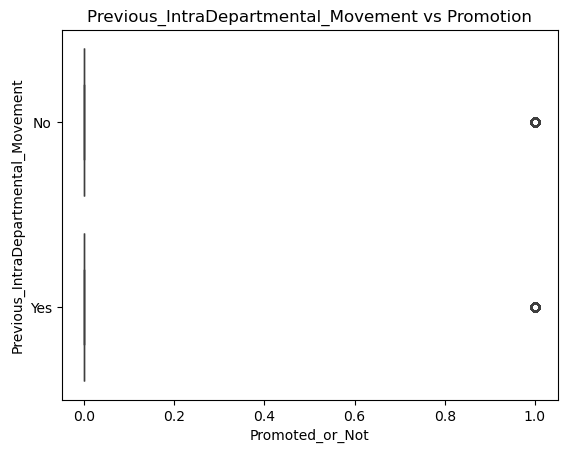

In [34]:
sns.boxplot(data=df, x='Promoted_or_Not', y='Previous_IntraDepartmental_Movement')
plt.title('Previous_IntraDepartmental_Movement vs Promotion')
plt.show

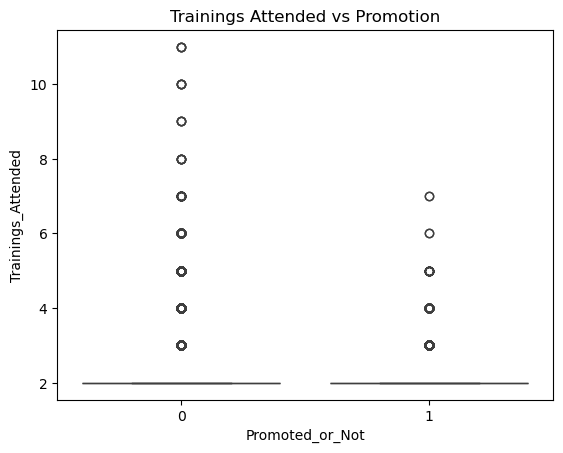

In [26]:
sns.boxplot(data=df, x='Promoted_or_Not', y='Trainings_Attended')
plt.title('Trainings Attended vs Promotion')
plt.show()


In [ ]:
df.boxplot(column='Last_performance_score', by='Promoted_or_Not')
plt.title('Performance Score vs Promotion')
plt.suptitle('')
plt.xlabel('Promotion Status (0 = No, 1 = Yes)')
plt.ylabel('Performance Score')
plt.show()


In [28]:
df.corr(numeric_only=True)['Promoted_or_Not'].sort_values(ascending=False)


Promoted_or_Not             1.000000
Targets_met                 0.224518
Previous_Award              0.201434
Training_score_average      0.178448
Last_performance_score      0.119690
Year_of_birth               0.017991
Year_of_recruitment         0.012287
No_of_previous_employers    0.001690
Trainings_Attended         -0.024345
Name: Promoted_or_Not, dtype: float64

In [31]:
promoted = df[df['Promoted_or_Not'] == 1]
not_promoted = df[df['Promoted_or_Not'] == 0]

print("Shape:", df.shape)
print("\n--- Promotion Rate ---\n")
print(df['Promoted_or_Not'].value_counts(normalize=True) * 100)

print("\n--- Numeric Feature Means ---\n")
print(df.groupby('Promoted_or_Not').mean(numeric_only=True))

print("\n--- Categorical Features ---\n")
for col in ['Gender', 'Channel_of_Recruitment', 'Marital_Status','Previous_IntraDepartmental_Movement']:
    print(f"\n{col} vs Promotion")
    print(pd.crosstab(df[col], df['Promoted_or_Not'], normalize='index') * 100)


Shape: (38312, 19)

--- Promotion Rate ---

Promoted_or_Not
0    91.54051
1     8.45949
Name: proportion, dtype: float64

--- Numeric Feature Means ---

                 Trainings_Attended  Year_of_birth  Last_performance_score  \
Promoted_or_Not                                                              
0                          2.258191    1986.167517                7.562730   
1                          2.204875    1986.661833                9.173095   

                 Year_of_recruitment  Targets_met  Previous_Award  \
Promoted_or_Not                                                     
0                        2013.123777     0.320379        0.013943   
1                        2013.311941     0.705955        0.122802   

                 Training_score_average  No_of_previous_employers  
Promoted_or_Not                                                    
0                             54.641584                  1.040318  
1                             63.210429              

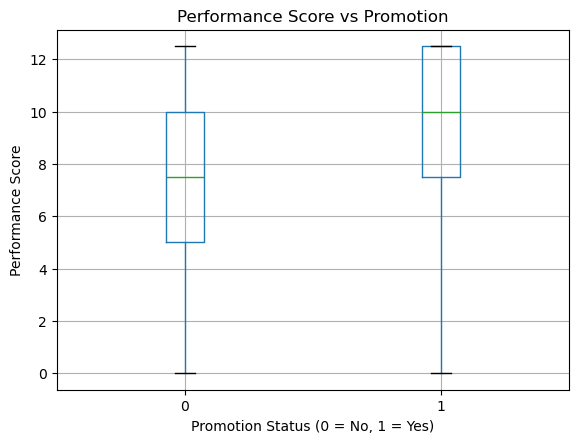

In [38]:
df.boxplot(column='Last_performance_score', by='Promoted_or_Not')
plt.title('Performance Score vs Promotion')
plt.suptitle('')
plt.xlabel('Promotion Status (0 = No, 1 = Yes)')
plt.ylabel('Performance Score')
plt.show()


In [39]:
df.groupby('Promoted_or_Not')['Trainings_Attended'].mean()


Promoted_or_Not
0    2.258191
1    2.204875
Name: Trainings_Attended, dtype: float64

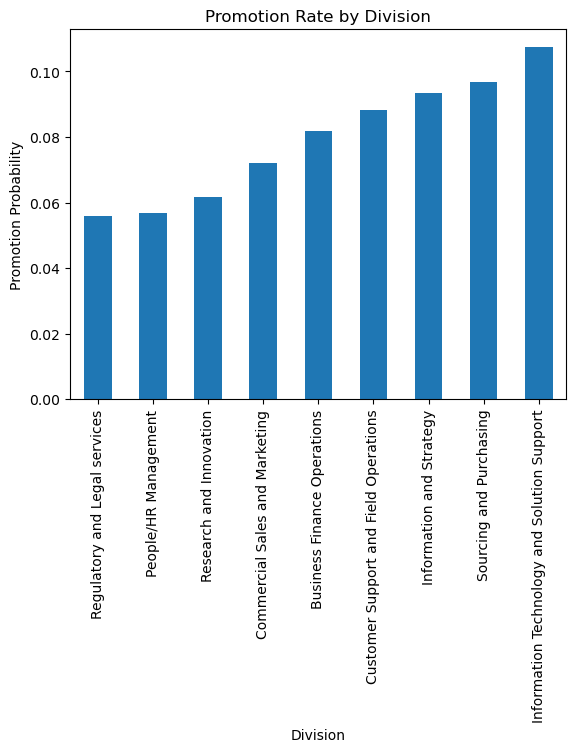

In [40]:
(df
 .groupby('Division')['Promoted_or_Not']
 .mean()
 .sort_values()
 .plot(kind='bar')
)

plt.title('Promotion Rate by Division')
plt.ylabel('Promotion Probability')
plt.xlabel('Division')
plt.show()


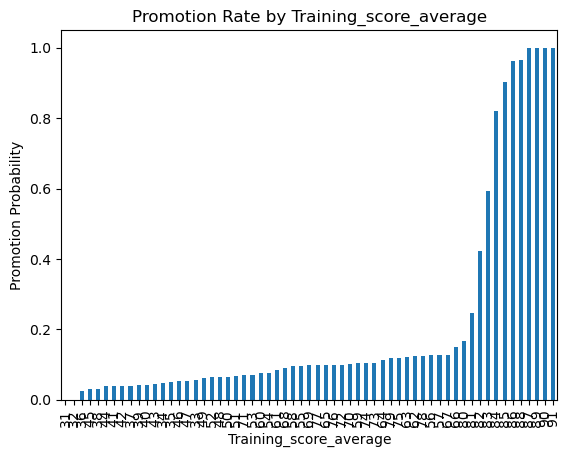

In [42]:
(df
 .groupby('Training_score_average')['Promoted_or_Not']
 .mean()
 .sort_values()
 .plot(kind='bar')
)

plt.title('Promotion Rate by Training_score_average')
plt.ylabel('Promotion Probability')
plt.xlabel('Training_score_average')
plt.show()

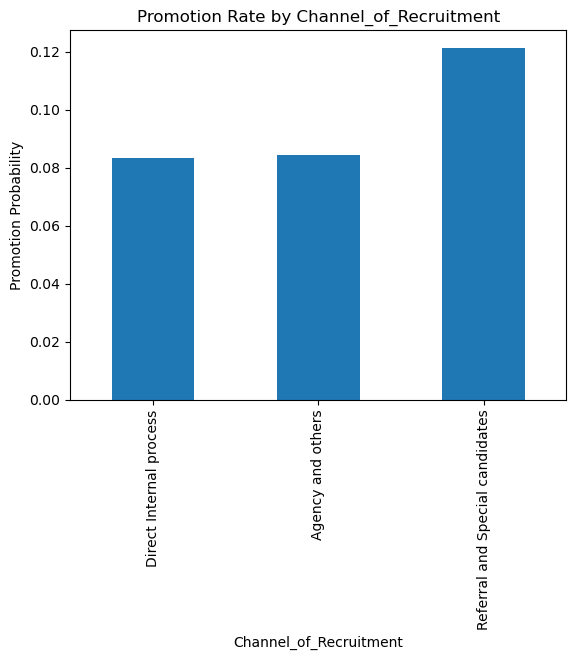

In [43]:
(df
 .groupby('Channel_of_Recruitment')['Promoted_or_Not']
 .mean()
 .sort_values()
 .plot(kind='bar')
)

plt.title('Promotion Rate by Channel_of_Recruitment')
plt.ylabel('Promotion Probability')
plt.xlabel('Channel_of_Recruitment')
plt.show()

In [44]:
pd.crosstab(df['Division'], df['Promoted_or_Not'], normalize='index') * 100


Promoted_or_Not,0,1
Division,,
Business Finance Operations,91.825308,8.174692
Commercial Sales and Marketing,92.808893,7.191107
Customer Support and Field Operations,91.170199,8.829801
Information Technology and Solution Support,89.256866,10.743134
Information and Strategy,90.647675,9.352325
People/HR Management,94.307512,5.692488
Regulatory and Legal services,94.406548,5.593452
Research and Innovation,93.821839,6.178161
Sourcing and Purchasing,90.320665,9.679335


In [45]:
pd.crosstab(df['Channel_of_Recruitment'], df['Promoted_or_Not'], normalize='index') * 100


Promoted_or_Not,0,1
Channel_of_Recruitment,,
Agency and others,91.572032,8.427968
Direct Internal process,91.682104,8.317896
Referral and Special candidates,87.871287,12.128713


In [46]:
pd.crosstab(df['Marital_Status'], df['Promoted_or_Not'], normalize='index') * 100


Promoted_or_Not,0,1
Marital_Status,,
Married,91.502804,8.497196
Not_Sure,89.256198,10.743802
Single,91.829075,8.170925


In [47]:
pd.crosstab(df['Trainings_Attended'], df['Promoted_or_Not'], normalize='index') * 100


Promoted_or_Not,0,1
Trainings_Attended,,
2,91.230109,8.769891
3,92.701119,7.298881
4,92.604502,7.395498
5,94.620253,5.379747
6,97.849462,2.150538
7,92.857143,7.142857
8,100.000000,0.000000
9,100.000000,0.000000
10,100.000000,0.000000


In [48]:
pd.crosstab(df['Targets_met'], df['Promoted_or_Not'], normalize='index') * 100


Promoted_or_Not,0,1
Targets_met,,
0,96.155398,3.844602
1,83.081928,16.918072


In [40]:
for col in df.columns:
    if df[col].dtype == 'object':  # categorical
        df[col] = df[col].fillna(df[col].mode()[0])
    else:  # numeric
        df[col] = df[col].fillna(df[col].mean())

# Standardize column names
df.columns = df.columns.str.strip().str.lower()


In [87]:

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print("Columns after standardization:\n", df.columns.tolist())

# Fill missing values
for col in df.columns:
    if df[col].dtype == 'object':  # categorical
        df[col] = df[col].fillna(df[col].mode()[0])
    else:  # numeric
        df[col] = df[col].fillna(df[col].mean())

# Remove duplicates
df.drop_duplicates(inplace=True)

# -----------------------
# 2️⃣ Create bins for numeric variables
import matplotlib.pyplot as plt
if 'division' in df.columns and 'promotion' in df.columns:
    plt.figure(figsize=(10,5))
    sns.countplot(x='division', hue='promotion', data=df)
    plt.title("Promotion count by Division")
    plt.xticks(rotation=45)
    plt.show()
# 3️⃣ Cross-tabulations
# -----------------------
# Performance vs Promotion
if 'performance_score' in df.columns and 'promotion' in df.columns:
    perf_promo = pd.crosstab(df['performance_score'], df['promotion'], normalize='index') * 100
    print("\nPromotion % by Performance Score:\n", perf_promo)

# Performance + Training vs Promotion
if 'performance_score' in df.columns and 'training_bins' in df.columns:
    perf_train_promo = pd.crosstab([df['performance_score'], df['training_bins']], df['promotion'], normalize='index') * 100
    print("\nPromotion % by Performance Score + Training Hours:\n", perf_train_promo)

# Age group vs Promotion
if 'age_group' in df.columns and 'promotion' in df.columns:
    age_promo = pd.crosstab(df['age_group'], df['promotion'], normalize='index') * 100
    print("\nPromotion % by Age Group:\n", age_promo)

# -----------------------
# 4️⃣ Grouped summaries
# -----------------------
# Division + Performance vs Promotion
if 'division' in df.columns and 'performance_score' in df.columns:
    div_perf_summary = df.groupby(['division', 'performance_score'])['promotion'].value_counts(normalize=True).unstack(fill_value=0) * 100
    print("\nPromotion % by Division + Performance:\n", div_perf_summary)

# -----------------------
# 5️⃣ Visualizations

if 'performance_score' in df.columns and 'training_bins' in df.columns:
    pt_table = pd.crosstab([df['performance_score'], df['training_bins']], df['promotion'], normalize='index') * 100
    plt.figure(figsize=(12,6))
    sns.heatmap(pt_table, annot=True, fmt=".1f", cmap="YlGnBu")
    plt.title("Promotion % by Performance Score and Training Hours")
    plt.show()

# Countplot: Division + Promotion
if 'division' in df.columns and 'promotion' in df.columns:
    plt.figure(figsize=(10,5))
    sns.countplot(x='division', hue='promotion', data=df)
    plt.title("Promotion count by Division")
    plt.xticks(rotation=45)
    plt.show()

# Boxplot: Age vs Promotion
if 'age' in df.columns and 'promotion' in df.columns:
    plt.figure(figsize=(8,5))
    sns.boxplot(x='promotion', y='age', data=df)
    plt.title("Age distribution by Promotion")
    plt.show()



Columns after standardization:
 ['employeeno', 'division', 'qualification', 'gender', 'channel_of_recruitment', 'trainings_attended', 'year_of_birth', 'last_performance_score', 'year_of_recruitment', 'targets_met', 'previous_award', 'training_score_average', 'state_of_origin', 'foreign_schooled', 'marital_status', 'past_disciplinary_action', 'previous_intradepartmental_movement', 'no_of_previous_employers', 'promoted_or_not']


In [3]:
import pandas as pd

df = pd.read_csv("promotion_dataset.csv")

if 'training_hours' in df.columns:
    df['training_bins'] = pd.cut(
        df['training_hours'], 
        bins=[0, 10, 20, 30, 50, 100], 
        labels=['0-10','11-20','21-30','31-50','51+']
    )


In [6]:
# Age
import pandas as pd

# Load your dataset
df = pd.read_csv("promotion_dataset.csv")  # replace with your file path

# Check column names to find the correct age column
print("Columns in dataset:", df.columns.tolist())

# Use the correct age column name (adjust if necessary)
age_col = None
for col in df.columns:
    if 'age' in col.lower():  # find column containing 'age'
        age_col = col
        break

if age_col:
    # Create age groups
    df['age_group'] = pd.cut(
        df[age_col],
        bins=[18, 25, 35, 45, 60],
        labels=['18-25', '26-35', '36-45', '46-60'],
        right=True,
        include_lowest=True
    )
    # Display first rows safely
    print(df[[age_col, 'age_group']].head())
else:
    print("No age column found in the dataset.")

Columns in dataset: ['EmployeeNo', 'Division', 'Qualification', 'Gender', 'Channel_of_Recruitment', 'Trainings_Attended', 'Year_of_birth', 'Last_performance_score', 'Year_of_recruitment', 'Targets_met', 'Previous_Award', 'Training_score_average', 'State_Of_Origin', 'Foreign_schooled', 'Marital_Status', 'Past_Disciplinary_Action', 'Previous_IntraDepartmental_Movement', 'No_of_previous_employers', 'Promoted_or_Not']
   Training_score_average age_group
0                      41     36-45
1                      52     46-60
2                      42     36-45
3                      42     36-45
4                      77       NaN


In [25]:
print(df.columns.tolist())

['employeeno', 'division', 'qualification', 'gender', 'channel_of_recruitment', 'trainings_attended', 'year_of_birth', 'last_performance_score', 'year_of_recruitment', 'targets_met', 'previous_award', 'training_score_average', 'state_of_origin', 'foreign_schooled', 'marital_status', 'past_disciplinary_action', 'previous_intradepartmental_movement', 'no_of_previous_employers', 'promoted_or_not']


In [26]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
print(df.columns.tolist())


['employeeno', 'division', 'qualification', 'gender', 'channel_of_recruitment', 'trainings_attended', 'year_of_birth', 'last_performance_score', 'year_of_recruitment', 'targets_met', 'previous_award', 'training_score_average', 'state_of_origin', 'foreign_schooled', 'marital_status', 'past_disciplinary_action', 'previous_intradepartmental_movement', 'no_of_previous_employers', 'promoted_or_not']


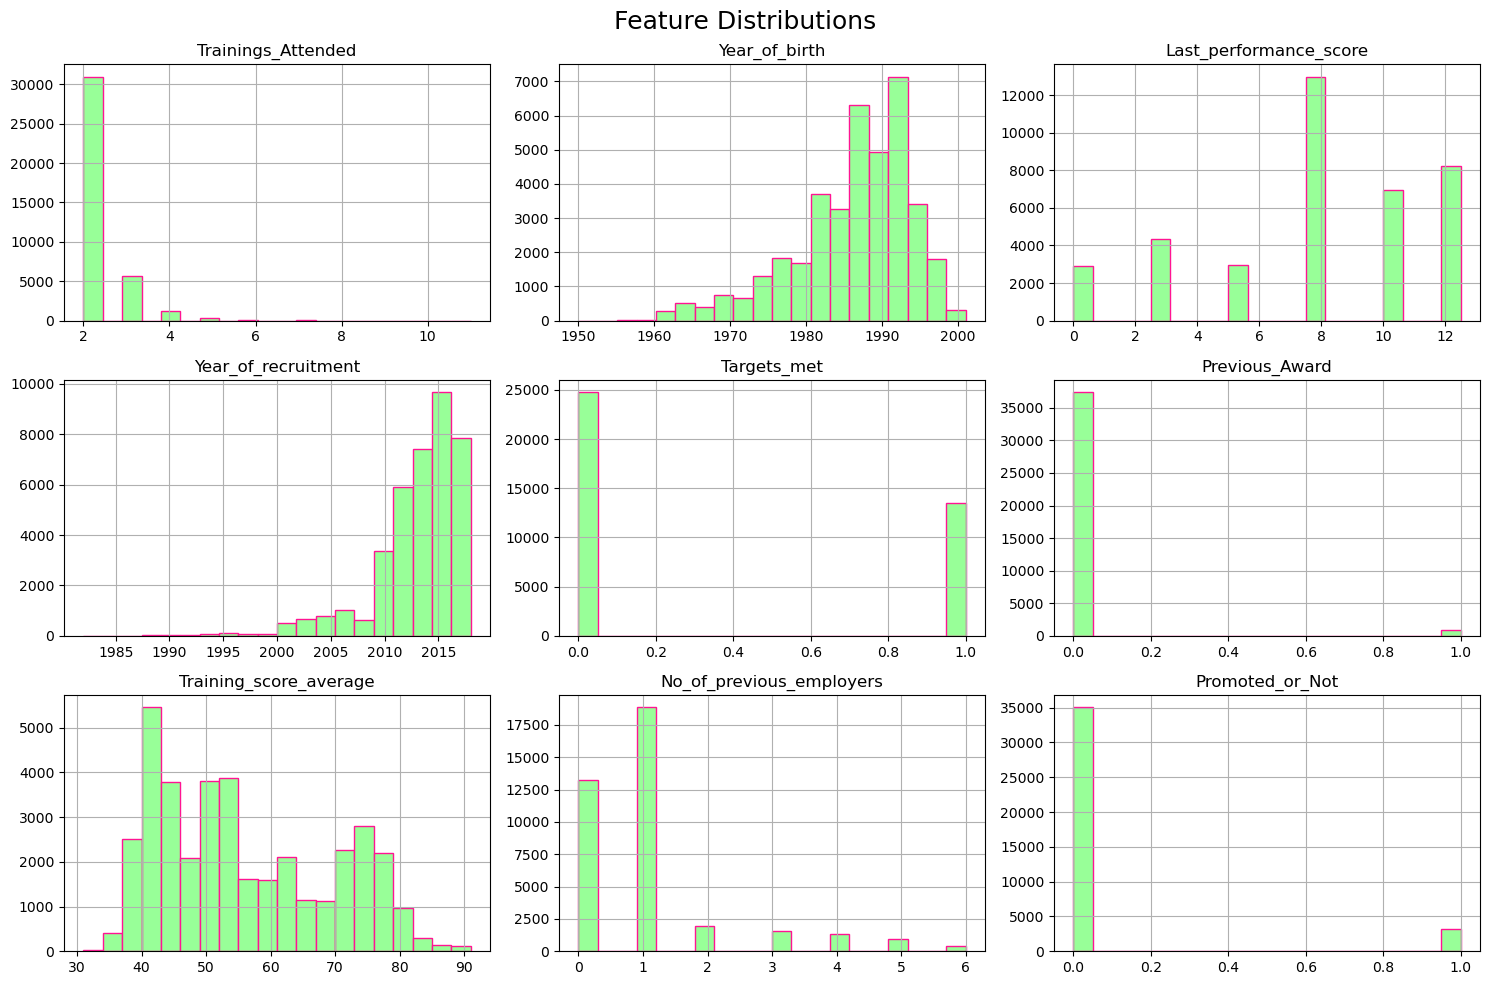

In [9]:
df.hist(figsize=(15, 10), bins=20, color= '#98FF98', edgecolor='#FF1493')
plt.suptitle('Feature Distributions', fontsize=18)
plt.tight_layout()
plt.show()

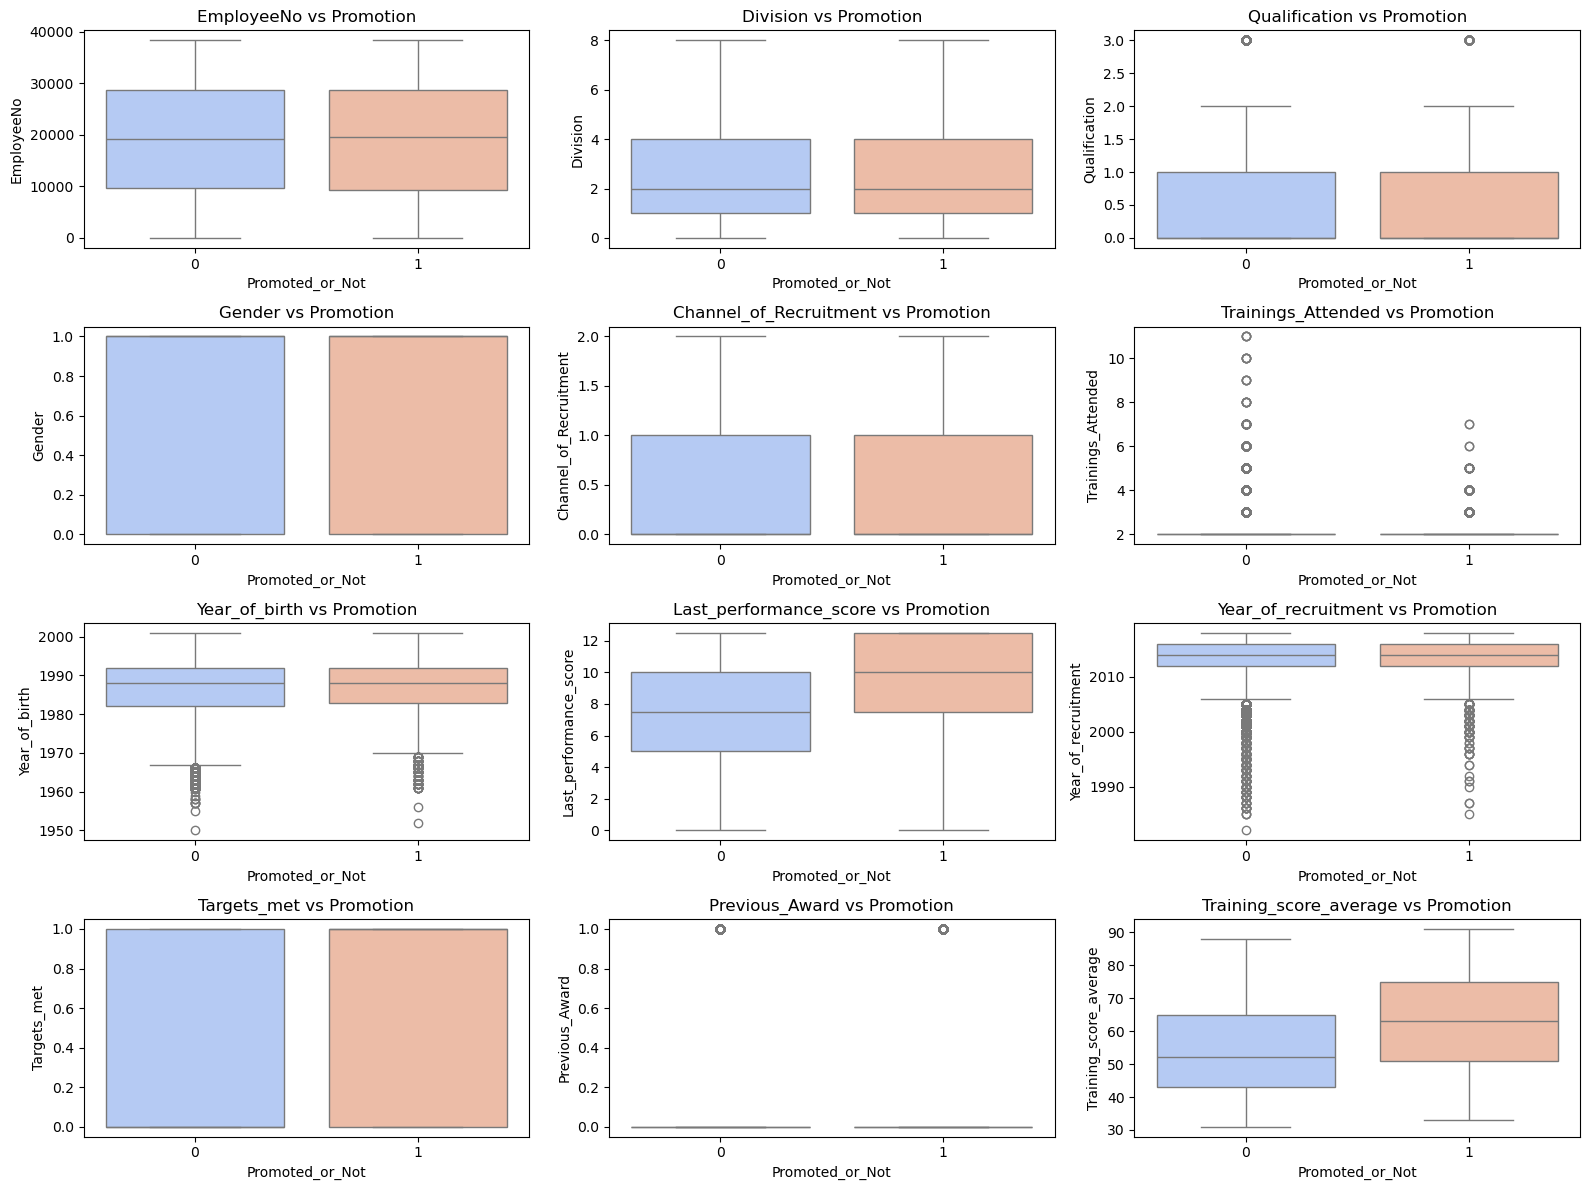

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("promotion_dataset.csv")
df.columns = df.columns.str.strip()

# Detect promotion column automatically
promotion_col = [col for col in df.columns if "promot" in col.lower()][0]

# Encode categorical features
cat_cols = df.select_dtypes(include="object").columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Numeric columns
numeric_cols = df.select_dtypes(include='number').columns
columns_to_plot = [col for col in numeric_cols if col != promotion_col]

rows, cols = 4, 3
max_plots = rows * cols
columns_to_plot = columns_to_plot[:max_plots]

plt.figure(figsize=(16, 12))

for idx, col in enumerate(columns_to_plot, 1):
    plt.subplot(rows, cols, idx)
    sns.boxplot(
        x=promotion_col,
        y=col,
        data=df,
        hue=promotion_col,   # REQUIRED to remove warning
        palette="coolwarm",
        legend=False
    )
    plt.title(f"{col} vs Promotion")
    plt.tight_layout()

plt.show()

Promotion column detected: promoted_or_not
Department column detected: ['previous_intradepartmental_movement']


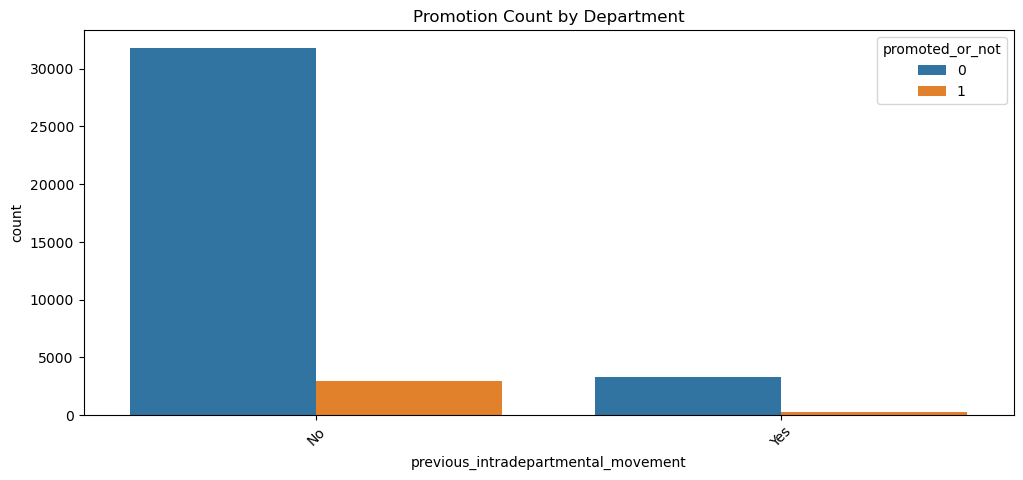

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# 2. Identify the correct promotion column
promotion_col = [col for col in df.columns if "promoted" in col][0]
print("Promotion column detected:", promotion_col)

# 3. Identify the correct department column
dept_candidates = [col for col in df.columns if "dept" in col or "department" in col]
print("Department column detected:", dept_candidates)

if len(dept_candidates) == 0:
    raise ValueError("No department-related column found!")
else:
    dept_col = dept_candidates[0]

# 4. Plot with corrected column names
plt.figure(figsize=(12,5))
sns.countplot(
    x=dept_col,
    hue=promotion_col,
    data=df
)
plt.title("Promotion Count by Department")
plt.xticks(rotation=45)
plt.show()


    EmployeeNo                               Division        Qualification  \
0  YAK/S/00001         Commercial Sales and Marketing     MSc  MBA and PhD   
1  YAK/S/00002  Customer Support and Field Operations  First Degree or HND   
2  YAK/S/00003         Commercial Sales and Marketing  First Degree or HND   
3  YAK/S/00004         Commercial Sales and Marketing  First Degree or HND   
4  YAK/S/00006               Information and Strategy  First Degree or HND   

   Gender   Channel_of_Recruitment  Trainings_Attended  Year_of_birth  \
0  Female  Direct Internal process                   2           1986   
1    Male        Agency and others                   2           1991   
2    Male  Direct Internal process                   2           1987   
3    Male        Agency and others                   3           1982   
4    Male  Direct Internal process                   3           1990   

   Last_performance_score  Year_of_recruitment  Targets_met  Previous_Award  \
0            

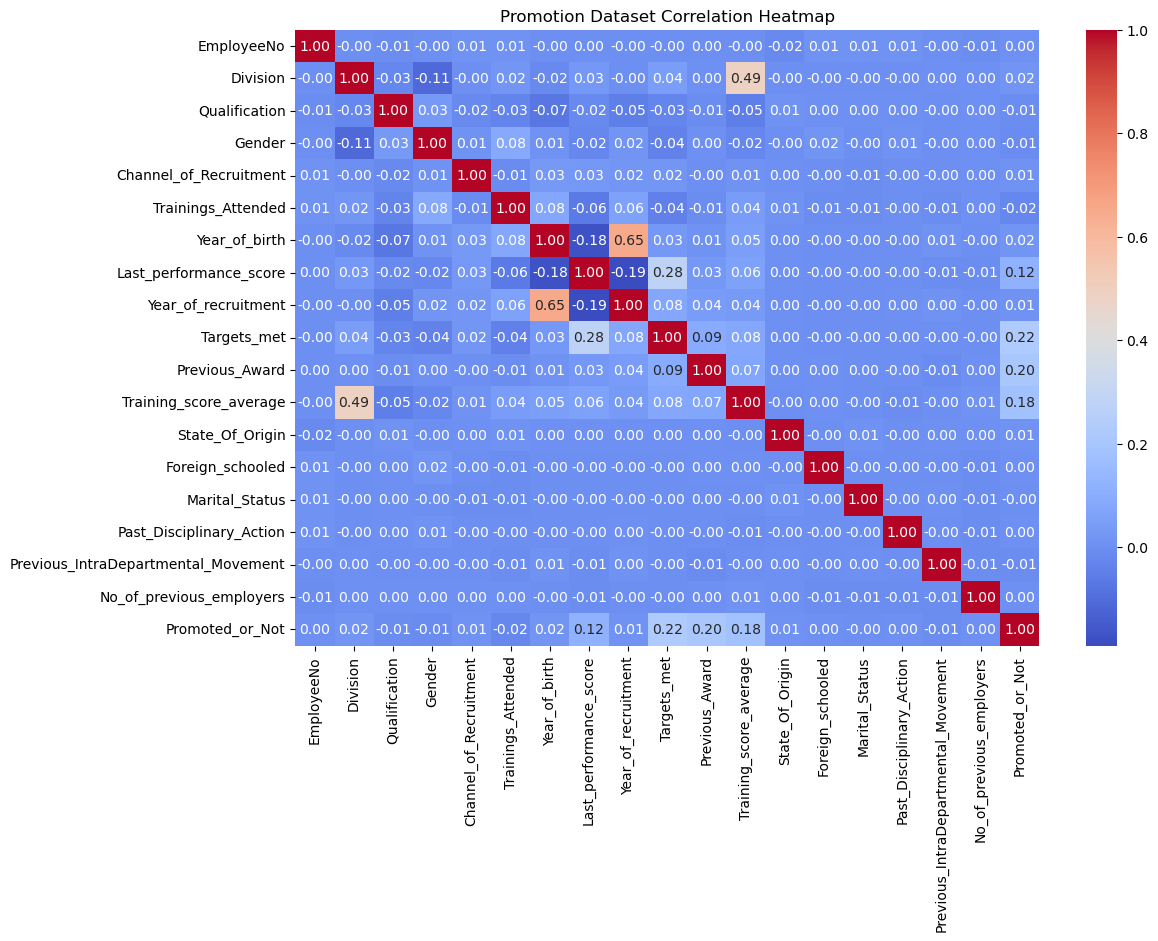

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load your dataset
# Replace 'promotion_data.csv' with your file path if different
df = pd.read_csv('promotion_dataset.csv')

# Check the first few rows
print(df.head())

# 1. Convert categorical columns to numerical
categorical_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# 2. Compute correlation matrix
corr = df.corr()

# 3. Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Promotion Dataset Correlation Heatmap")
plt.show()

In [44]:
import numpy as np

# Identify numeric columns in the promotion dataset
numeric_cols = df.select_dtypes(include='number').columns.tolist()

# Remove the promotion column from the list
promotion_col = [col for col in df.columns if "promot" in col.lower()][0]
numeric_cols = [col for col in numeric_cols if col != promotion_col]

print("Numeric columns detected:")
print(numeric_cols)

# Replace 0 with NaN ONLY in numeric columns (if 0 is invalid measurement)
df[numeric_cols] = df[numeric_cols].replace(0, np.nan)

# Check missing values
df.isnull().sum()


Numeric columns detected:
['EmployeeNo', 'Division', 'Qualification', 'Gender', 'Channel_of_Recruitment', 'Trainings_Attended', 'Year_of_birth', 'Last_performance_score', 'Year_of_recruitment', 'Targets_met', 'Previous_Award', 'Training_score_average', 'State_Of_Origin', 'Foreign_schooled', 'Marital_Status', 'Past_Disciplinary_Action', 'Previous_IntraDepartmental_Movement', 'No_of_previous_employers']


EmployeeNo                                 1
Division                                1786
Qualification                          25578
Gender                                 11432
Channel_of_Recruitment                 21310
Trainings_Attended                         0
Year_of_birth                              0
Last_performance_score                  2905
Year_of_recruitment                        0
Targets_met                            24788
Previous_Award                         37425
Training_score_average                     0
State_Of_Origin                          950
Foreign_schooled                        3317
Marital_Status                         31022
Past_Disciplinary_Action               38161
Previous_IntraDepartmental_Movement    34709
No_of_previous_employers               13272
Promoted_or_Not                            0
dtype: int64

In [45]:
df.fillna(df.median(), inplace=True)

In [46]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# -------------------------------
# Detect the promotion (target) column automatically
# -------------------------------
promotion_col = [col for col in df.columns if "promot" in col.lower()][0]
print("Target column detected:", promotion_col)

# -------------------------------
# Separate features and target
# -------------------------------
X = df.drop(promotion_col, axis=1)
y = df[promotion_col]

# -------------------------------
# Handle categorical features
# Convert all categorical columns to numeric
# -------------------------------
from sklearn.preprocessing import LabelEncoder

cat_cols = X.select_dtypes(include='object').columns
le = LabelEncoder()

for col in cat_cols:
    X[col] = le.fit_transform(X[col])

# -------------------------------
# Scale numerical features
# -------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Shape of scaled features:", X_scaled.shape)

Target column detected: Promoted_or_Not
Shape of scaled features: (38312, 18)


In [48]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)
sfs_forward = SequentialFeatureSelector(logreg, n_features_to_select=6, direction='forward')
sfs_forward.fit(X_scaled, y)

selected_forward = X.columns[sfs_forward.get_support()]
print("Selected Features (Forward Selection):", list(selected_forward))


Selected Features (Forward Selection): ['EmployeeNo', 'Division', 'Qualification', 'Gender', 'Channel_of_Recruitment', 'Trainings_Attended']


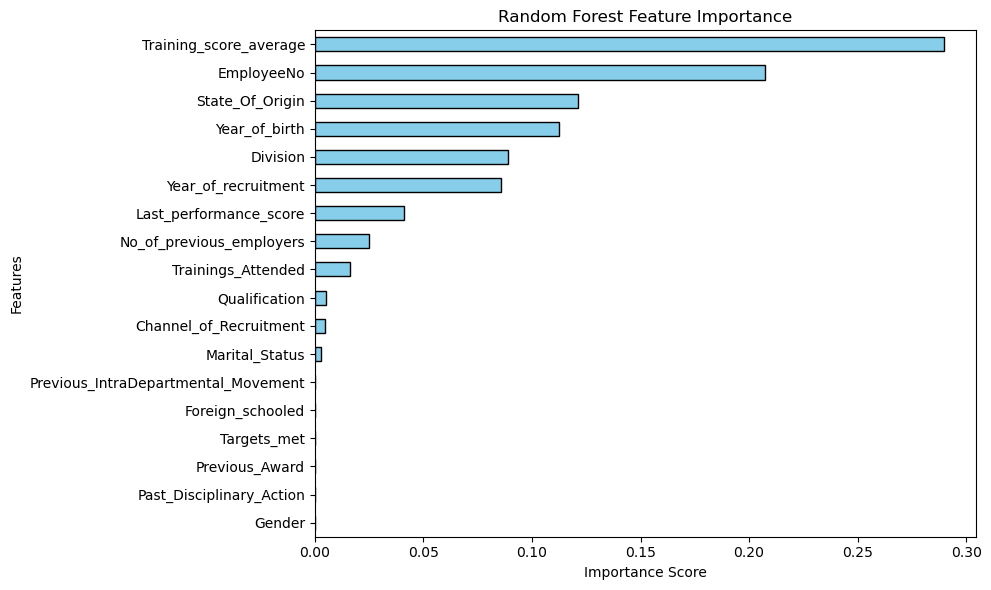

Top Features by Random Forest:
Training_score_average                 0.289953
EmployeeNo                             0.207339
State_Of_Origin                        0.121207
Year_of_birth                          0.112466
Division                               0.088786
Year_of_recruitment                    0.085663
Last_performance_score                 0.041026
No_of_previous_employers               0.025140
Trainings_Attended                     0.016286
Qualification                          0.004973
Channel_of_Recruitment                 0.004438
Marital_Status                         0.002722
Targets_met                            0.000000
Gender                                 0.000000
Foreign_schooled                       0.000000
Previous_Award                         0.000000
Past_Disciplinary_Action               0.000000
Previous_IntraDepartmental_Movement    0.000000
dtype: float64


In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# Detect the promotion column
promotion_col = [col for col in df.columns if "promot" in col.lower()][0]

# Prepare features (X) and label (y)
X = df.drop(promotion_col, axis=1)
y = df[promotion_col]

# Encode categorical columns
cat_cols = X.select_dtypes(include='object').columns
le = LabelEncoder()

for col in cat_cols:
    X[col] = le.fit_transform(X[col])

# Train Random Forest 
rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X, y)

# Feature Importance
importances = rf.feature_importances_
features = pd.Series(importances, index=X.columns)

plt.figure(figsize=(10, 6))
features.sort_values().plot(
    kind='barh',
    title="Random Forest Feature Importance",
    color='skyblue',
    edgecolor='black'
)
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# Print Ranked Features
print("Top Features by Random Forest:")
print(features.sort_values(ascending=False))


In [52]:
import pandas as pd
df = pd.read_csv("promotion_dataset.csv")

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

promotion_col = [col for col in df.columns if "promot" in col.lower()][0]
print("Target column detected:", promotion_col)

X = df.drop(columns=[promotion_col])
y = df[promotion_col]

cat_cols = X.select_dtypes(include='object').columns
le = LabelEncoder()
for col in cat_cols:
    X[col] = le.fit_transform(X[col])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)
print("Shapes:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


Target column detected: Promoted_or_Not
Shapes:
X_train: (30649, 18)
X_test: (7663, 18)
y_train: (30649,)
y_test: (7663,)


In [54]:
print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)

Training Set Shape: (30649, 18)
Testing Set Shape: (7663, 18)


In [56]:
print("X_train shape:", X_train.shape) 
print("X_test shape:", X_test.shape)     
print("y_train shape:", y_train.shape)   
print("y_test shape:", y_test.shape) 

X_train shape: (30649, 18)
X_test shape: (7663, 18)
y_train shape: (30649,)
y_test shape: (7663,)


In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [58]:
y_pred = model.predict(X_test) 

In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      7015
           1       0.72      0.08      0.15       648

    accuracy                           0.92      7663
   macro avg       0.82      0.54      0.55      7663
weighted avg       0.91      0.92      0.89      7663



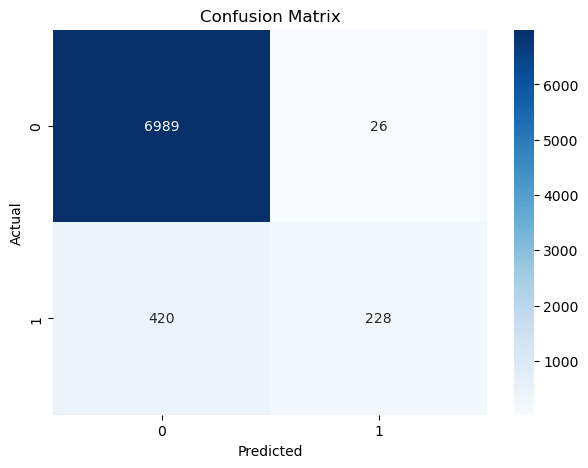

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Get actual class labels
labels = sorted(y_test.unique())

# Plot heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels,
            yticklabels=labels)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
df = pd.read_csv("promotion_dataset.csv")
df.columns = df.columns.str.strip()

# Detect target column automatically
target_col = [col for col in df.columns if "promot" in col.lower()][0]

# Split features and target
X = df.drop(columns=[target_col])
y = df[target_col

# Encode categoricals
cat_cols = X.select_dtypes(include="object").columns
le = LabelEncoder()
for col in cat_cols:
    X[col] = le.fit_transform(X[col].astype(str))

# Scale data
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Random Forest + GridSearch
rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(
    rf,
    param_grid,
    cv=3,
    n_jobs=-1,
    verbose=1,
    scoring="accuracy"
)

grid_search.fit(X_train, y_train)

# Retrieve the BEST model
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Predictions
y_pred = best_rf.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 24 candidates, totalling 72 fits


In [5]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)

print("\nConfusion Matrix:\n", conf_mat)

class_labels = [0, 1]  # Not Promoted, Promoted

for i, label in enumerate(class_labels):
    TP = conf_mat[i, i]
    FP = conf_mat[:, i].sum() - TP
    FN = conf_mat[i, :].sum() - TP
    TN = conf_mat.sum() - (TP + FP + FN)

    print(f"\nClass {label} ({'Promoted' if label == 1 else 'Not Promoted'}):")
    print(f"  TP: {TP}")
    print(f"  FP: {FP}")
    print(f"  FN: {FN}")
    print(f"  TN: {TN}")



Confusion Matrix:
 [[10492    27]
 [  920    55]]

Class 0 (Not Promoted):
  TP: 10492
  FP: 920
  FN: 27
  TN: 55

Class 1 (Promoted):
  TP: 55
  FP: 27
  FN: 920
  TN: 10492


In [10]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("promotion_dataset.csv")

# Standardize column names
df.columns = df.columns.str.strip()

# 3. Detect the target column automatically
target_col = [col for col in df.columns if "promot" in col.lower()][0]

# 4. Separate X and y
X = df.drop(columns=[target_col])
y = df[target_col]

# 5. Encode categorical columns
cat_cols = X.select_dtypes(include="object").columns

le = LabelEncoder()
for col in cat_cols:
    X[col] = le.fit_transform(X[col].astype(str))

# 6. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 7. Build XGBoost model
model = XGBClassifier(
    n_estimators=800,
    max_depth=6,
    learning_rate=0.05,
    objective="binary:logistic",
    eval_metric="logloss"
)
# 8. Train model
model.fit(X_train, y_train)
# 9. Predict
y_pred = model.predict(X_test)
# 10. Evaluation
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy Score: 0.9417982513375962

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      7015
           1       0.90      0.35      0.51       648

    accuracy                           0.94      7663
   macro avg       0.92      0.67      0.74      7663
weighted avg       0.94      0.94      0.93      7663



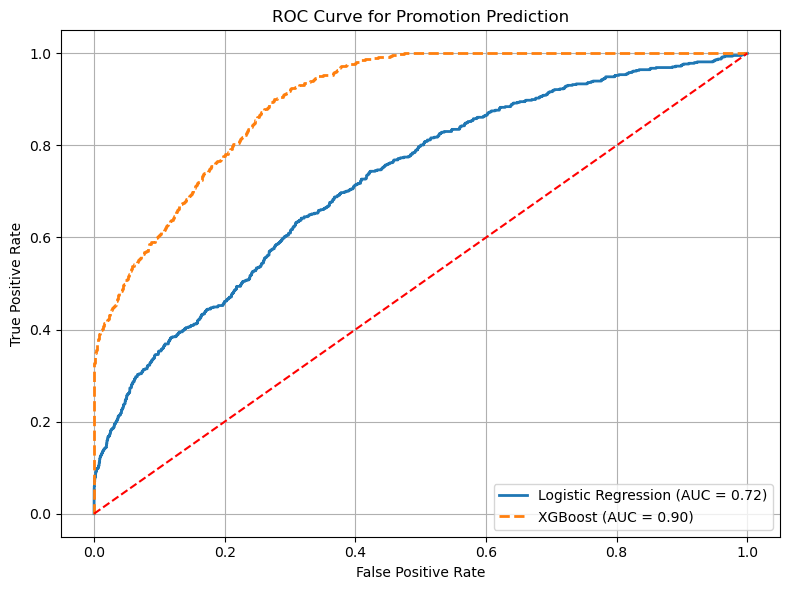

In [12]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

# Logistic Regression
logistic_model = LogisticRegression(solver='liblinear', max_iter=5000)
logistic_model.fit(X_train, y_train)
log_proba = logistic_model.predict_proba(X_test)[:, 1]

# XGBoost
xgb_model = XGBClassifier(eval_metric='logloss', use_label_encoder=None)
xgb_model.fit(X_train, y_train)
xgb_proba = xgb_model.predict_proba(X_test)[:, 1]

# ROC curves
fpr_log, tpr_log, _ = roc_curve(y_test, log_proba)
auc_log = auc(fpr_log, tpr_log)

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_proba)
auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot
plt.figure(figsize=(8,6))
plt.plot(fpr_log, tpr_log, lw=2, label=f'Logistic Regression (AUC = {auc_log:.2f})')
plt.plot(fpr_xgb, tpr_xgb, lw=2, linestyle='--', label=f'XGBoost (AUC = {auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Promotion Prediction')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

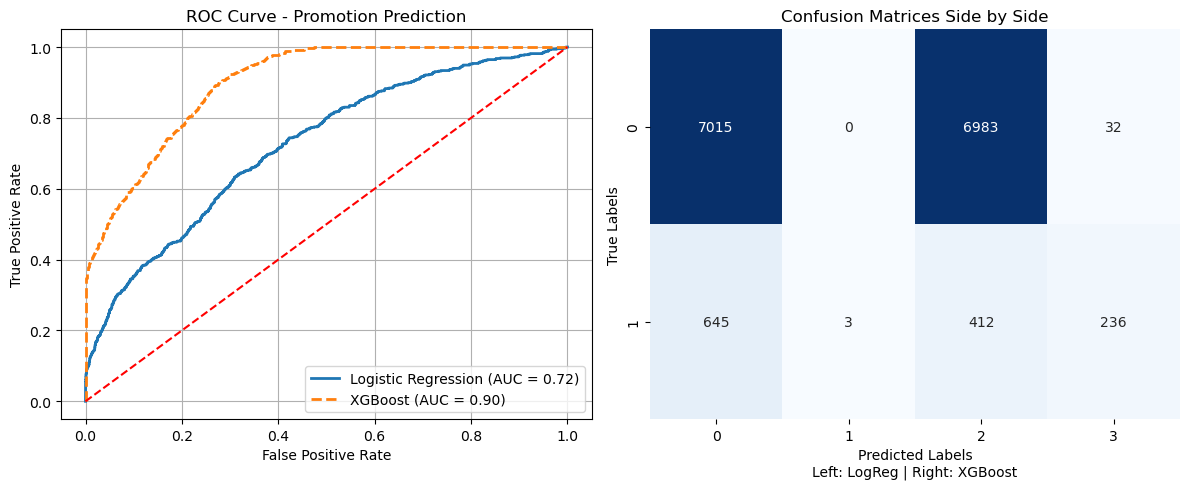

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, confusion_matrix
from xgboost import XGBClassifier

# ----------------------------
# 1. Fit Logistic Regression
# ----------------------------
log_model = LogisticRegression(solver='liblinear', max_iter=5000)
log_model.fit(X_train, y_train)
log_proba = log_model.predict_proba(X_test)[:, 1]
log_pred = log_model.predict(X_test)

# ----------------------------
# 2. Fit XGBoost
# ----------------------------
xgb_model = XGBClassifier(eval_metric='logloss', use_label_encoder=None)
xgb_model.fit(X_train, y_train)
xgb_proba = xgb_model.predict_proba(X_test)[:, 1]
xgb_pred = xgb_model.predict(X_test)

# ----------------------------
# 3. Compute ROC and AUC
# ----------------------------
fpr_log, tpr_log, _ = roc_curve(y_test, log_proba)
auc_log = auc(fpr_log, tpr_log)

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_proba)
auc_xgb = auc(fpr_xgb, tpr_xgb)

# ----------------------------
# 4. Plot ROC curves
# ----------------------------
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(fpr_log, tpr_log, lw=2, label=f'Logistic Regression (AUC = {auc_log:.2f})')
plt.plot(fpr_xgb, tpr_xgb, lw=2, linestyle='--', label=f'XGBoost (AUC = {auc_xgb:.2f})')
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Promotion Prediction')
plt.legend(loc='lower right')
plt.grid(True)

# ----------------------------
# 5. Plot Confusion Matrices
# ----------------------------
plt.subplot(1,2,2)

cm_log = confusion_matrix(y_test, log_pred)
cm_xgb = confusion_matrix(y_test, xgb_pred)

# Concatenate confusion matrices for side-by-side comparison
cm_combined = np.hstack((cm_log, cm_xgb))

sns.heatmap(cm_combined, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels\nLeft: LogReg | Right: XGBoost')
plt.ylabel('True Labels')
plt.title('Confusion Matrices Side by Side')

plt.tight_layout()
plt.show()
